#Qiskit14

4 server e 4 macchine virtuali

In [ ]:
!pip install Qiskit ipywidgets
!pip install qiskit
!pip install qiskit_optimization
!pip install qiskit-optimization
!pip install cplex
!pip install ibm-quantum-widgets
!pip install docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 7.0 MB/s 
     |████████████████████████████████| 18.0 MB 145 kB/s 
     |████████████████████████████████| 240 kB 42.8 MB/s 
     |████████████████████████████████| 198 kB 18.1 MB/s 
     |████████████████████████████████| 112 kB 42.0 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 4.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 54.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 8.0 MB/s 
     |████████████████████████████████| 49 kB 8.4 MB/s 
     |████████████████████████████████| 4.0 MB 39.4 MB/s 
     |████████████████████████████████| 112 kB 72.2 MB/s 
  Created wheel for Qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=d484f1cde36

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [ ]:
import time
from typing import List, Optional, Any
import numpy as np
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils.algorithm_globals import algorithm_globals
algorithm_globals.massive=True

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [ ]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

In [ ]:
# construct model using docplex
mdl = Model("ex7")

#server = M = 4 = i = i0, i1, i2, i4
#virtual machine = N = 4 = j = j0, j1, j2, j3, j4
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = mdl.binary_var(name="si0")
si1 = mdl.binary_var(name="si1")
si2 = mdl.binary_var(name="si2")
si3 = mdl.binary_var(name="si3")
#si4 = mdl.binary_var(name="si4")


vj0i0 = mdl.binary_var(name="vj0i0")
vj1i0 = mdl.binary_var(name="vj1i0")
vj2i0 = mdl.binary_var(name="vj2i0")
vj3i0 = mdl.binary_var(name="vj3i0")
#vj4i0 = mdl.binary_var(name="vj4i0")
vj0i1 = mdl.binary_var(name="vj0i1")
vj1i1 = mdl.binary_var(name="vj1i1")
vj2i1 = mdl.binary_var(name="vj2i1")
vj3i1 = mdl.binary_var(name="vj3i1")
#vj4i1 = mdl.binary_var(name="vj4i1")
vj0i2 = mdl.binary_var(name="vj0i2")
vj1i2 = mdl.binary_var(name="vj1i2")
vj2i2 = mdl.binary_var(name="vj2i2")
vj3i2 = mdl.binary_var(name="vj3i2")
#vj4i2 = mdl.binary_var(name="vj4i2")
vj0i3 = mdl.binary_var(name="vj0i3")
vj1i3 = mdl.binary_var(name="vj1i3")
vj2i3 = mdl.binary_var(name="vj2i3")
vj3i3 = mdl.binary_var(name="vj3i3")
#vj4i3 = mdl.binary_var(name="vj4i3")
vj0i4 = mdl.binary_var(name="vj0i4")
vj1i4 = mdl.binary_var(name="vj1i4")
vj2i4 = mdl.binary_var(name="vj2i4")
vj3i4 = mdl.binary_var(name="vj3i4")
#vj4i4 = mdl.binary_var(name="vj4i4")

#pi = mdl.continuous_var(name="pi")
#pd = mdl.continuous_var(name="pd")
#pi = mdl.binary_var(name="pi")
#pd = mdl.binary_var(name="pd")
pi = 10
pd = 5

ci0 = 100
ci1 = 110
ci2 = 100
ci3 = 110
#ci4 = 120


uj0 = mdl.integer_var(name="uj0")
uj1 = mdl.integer_var(name="uj1")
uj2 = mdl.integer_var(name="uj2")
uj3 = mdl.integer_var(name="uj3")
#uj4 = mdl.integer_var(name="uj4")

In [ ]:
sum0 = (vj0i0+vj1i0+vj2i0+vj3i0)#+vj4i0)
sum1 = (vj0i1+vj1i1+vj2i1+vj3i1)#+vj4i1)
sum2 = (vj0i2+vj1i2+vj2i2+vj3i2)#+vj4i2)
sum3 = (vj0i3+vj1i3+vj2i3+vj3i3)#+vj4i3)
#sum4 = (vj0i4+vj1i4+vj2i4+vj3i4)#+vj4i4)
sum5 = (vj0i0+vj0i1+vj0i2+vj0i3)#+vj0i4)
sum6 = (vj1i0+vj1i1+vj1i2+vj1i3)#+vj1i4)
sum7 = (vj2i0+vj2i1+vj2i2+vj2i3)#+vj2i4)
sum8 = (vj3i0+vj3i1+vj3i2+vj3i3)#+vj3i4)
#sum9 = (vj4i0+vj4i1+vj4i2+vj4i3)#+vj4i4)

In [ ]:
mdl.minimize((pi*si0+pd*(uj0*sum0))+(pi*si1+pd*(uj1*sum1))+(pi*si2+pd*(uj2*sum2)))
mdl.add_constraint(sum0 <= ci0*si0, "cons0")
mdl.add_constraint(sum1 <= ci1*si1, "cons1")
mdl.add_constraint(sum2 <= ci2*si2, "cons2")
mdl.add_constraint(sum3 <= ci3*si3, "cons3")
#mdl.add_constraint(sum4 <= ci4*si4, "cons4")
mdl.add_constraint(sum5 == 1, "cons5")
mdl.add_constraint(sum6 == 1, "cons6")
mdl.add_constraint(sum7 == 1, "cons7")
mdl.add_constraint(sum8 == 1, "cons8")
#mdl.add_constraint(sum9 == 1, "cons9")
mdl.add_constraint(uj0 <= ci0, "cons10")
mdl.add_constraint(uj1 <= ci1, "cons11")
mdl.add_constraint(uj2 <= ci2, "cons12")
mdl.add_constraint(uj3 <= ci3, "cons13")
#mdl.add_constraint(uj4 <= ci4, "cons14")
mdl.add_constraint(ci0 >= 0, "cons15")
mdl.add_constraint(ci1 >= 0, "cons16")                  
mdl.add_constraint(ci2 >= 0, "cons17")
mdl.add_constraint(ci3 >= 0, "cons18")
#mdl.add_constraint(ci4 >= 0, "cons19")

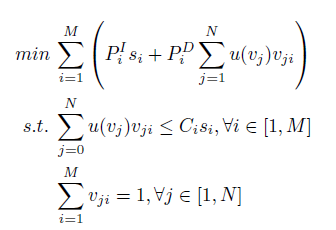

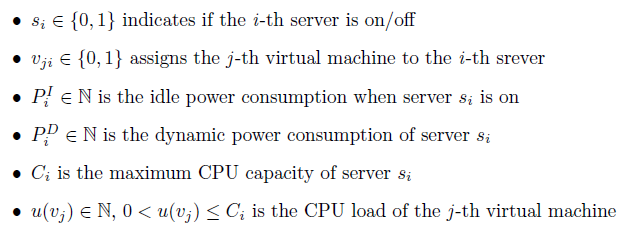

In [ ]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex7

Minimize
 obj: 10 si0 + 10 si1 + 10 si2 + [ 10 vj0i0*uj0 + 10 vj1i0*uj0 + 10 vj2i0*uj0
      + 10 vj3i0*uj0 + 10 vj0i1*uj1 + 10 vj1i1*uj1 + 10 vj2i1*uj1 + 10 vj3i1*uj1
      + 10 vj0i2*uj2 + 10 vj1i2*uj2 + 10 vj2i2*uj2 + 10 vj3i2*uj2 ]/2
Subject To
 cons0: - 100 si0 + vj0i0 + vj1i0 + vj2i0 + vj3i0 <= 0
 cons1: - 110 si1 + vj0i1 + vj1i1 + vj2i1 + vj3i1 <= 0
 cons2: - 100 si2 + vj0i2 + vj1i2 + vj2i2 + vj3i2 <= 0
 cons3: - 110 si3 + vj0i3 + vj1i3 + vj2i3 + vj3i3 <= 0
 cons5: vj0i0 + vj0i1 + vj0i2 + vj0i3 = 1
 cons6: vj1i0 + vj1i1 + vj1i2 + vj1i3 = 1
 cons7: vj2i0 + vj2i1 + vj2i2 + vj2i3 = 1
 cons8: vj3i0 + vj3i1 + vj3i2 + vj3i3 = 1
 cons10: uj0 <= 100
 cons11: uj1 <= 110
 cons12: uj2 <= 100
 cons13: uj3 <= 110

Bounds
 0 <= si0 <= 1
 0 <= si1 <= 1
 0 <= si2 <= 1
 0 <= si3 <= 1
 0 <= vj0i0 <= 1
 0 <= vj1i0 <= 1
 0 <= vj2i0 <= 1
 0 <= vj3i0 <= 1
 0 <= vj0i1 <= 1
 0 <= vj1i1 <= 1
 0 <= vj2i1 <= 1
 0 <= vj3i1 

In [ ]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [ ]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(params=admm_params,
                     qubo_optimizer=qubo_optimizer,
                     continuous_optimizer=convex_optimizer,
                    )

In [ ]:
# run ADMM to solve problem
#%tb
result = admm.solve(qp)

KeyboardInterrupt: ignored

In [ ]:
print("x={:}".format(result.x))
print("fval={:.7f}".format(result.fval))
print("x={:}".format(result.state.residuals))

In [ ]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [ ]:
lista = []
lista = result.state.residuals

In [ ]:
result

In [ ]:
v00

In [ ]:
lista

In [ ]:
import statistics
print(statistics.median(lista))

In [ ]:
result.state

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

In [ ]:
result.state.residuals

[0.00012141369162106502,
 0.0001598523981620667,
 0.0001363096183023072,
 0.00013366164218028267,
 0.00019449940125445926,
 0.00024421444450206735,
 0.00025167611916002527,
 0.00021537106591262232,
 0.00017643815976730237,
 0.00020383167704402593,
 0.00020170300246574247,
 0.000206931492765146,
 0.00018333844684891904,
 0.00021713388762022385,
 0.00020994328184666586,
 0.00024296944946516823,
 0.00024457664693026417,
 0.0002482295854048988,
 0.00018674532898820407,
 0.00019769590967444976,
 0.00019411858974276858,
 0.00024375739869511538,
 0.0002089992531592181,
 0.00020951181251973,
 0.0002483011004500093,
 0.0002250386902197582,
 0.00016766718356675924,
 0.00018897679470788073,
 0.00021242228282042198,
 0.00016713528881829182,
 0.00018282550408267565,
 0.00020721244869612994,
 0.00021869402792425632,
 0.00022081927154776182,
 0.00022754474554158595,
 0.00020706677412881896,
 0.00022560653748116146,
 0.00019025344701929618,
 0.0002385655425094464,
 0.00021635261763172078,
 0.00015843035492153822,
 0.00023195609359490414,
 0.0001720417937579681,
 0.0002204567297929457,
 0.00020705422902170338,
 0.00022724698997758188,
 0.0001886879055553237,
 0.00016933489224124583,
 0.00023193334781205417,
 0.00024620261401048693,
 0.00021665867994080212,
 0.00017219817427995945,
 0.0002075162072621998,
 0.00019728938796329234,
 0.0002028710199885681,
 0.0002199754406369366,
 0.00021008534603531942,
 0.0002331317949101826,
 0.00018383408521425608,
 0.00016520636586350823,
 0.00017108218707767957,
 0.00020963499258483986,
 0.0002223718285616617,
 0.0001977060669191568,
 0.00021587937372126003,
 0.0002284688515442429,
 0.00024385221917543986,
 0.00022164365397135498,
 0.0002339541056982006,
 0.00023184329593895061,
 0.00019166237528336544,
 0.00012148903950409603,
 0.0002023643240921501,
 0.00020890726059580848,
 0.00017840574866187555,
 0.00023026937836401358,
 0.0002077260937902401,
 0.0002160060175027085,
 0.00020155481028227344,
 0.00016570810369272447,
 0.0002154519837066465,
 0.0002047177186078402,
 0.00022776723077289258,
 0.0002004791382536291,
 0.00019532522431252858,
 0.0001965864008870737,
 0.00024713351166330756,
 0.0002225147745767656,
 0.00023356609090968112,
 0.00018672295206642652,
 0.00017706244697246435,
 0.0002312611336018245,
 0.00016143810647910342,
 0.00017801328530882057,
 0.00023217463560229267,
 0.00016807407152833376,
 0.00019893348274143088,
 0.00018770003833946695,
 0.00013960812242918945,
 0.0001762894637224225]

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright